# Leadscore predict

## Import

In [2]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
dados = pd.read_excel('/content/drive/My Drive/Colab Notebooks/leadscore_database.xlsx')
dados.head()

,ID,mes,perfil_pessoa,name,utm_source,Convert
0,8514,201707,dono,no_name,google,0
1,1183,201701,dono,no_name,google,0
2,7696,201706,dono,no_name,google,0
3,7694,201706,dono,no_name,google,0
4,7679,201706,dono,no_name,google,0


In [26]:
dados.name.unique()

array(['no_name', 'outros', 'truck', 'bar', 'lanche', 'restaurante',
       'sorveteria', 'pizzaria', 'cafe'], dtype=object)

## Data Cleaning


In [7]:
dados.isnull().sum()

ID                 0
mes                0
perfil_pessoa      0
name               0
utm_source       612
Convert            0
dtype: int64

In [12]:
dados.utm_source.fillna('outros', inplace=True)

In [13]:
dados.isnull().sum()

ID               0
mes              0
perfil_pessoa    0
name             0
utm_source       0
Convert          0
dtype: int64

In [14]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             2653 non-null   int64 
 1   mes            2653 non-null   int64 
 2   perfil_pessoa  2653 non-null   object
 3   name           2653 non-null   object
 4   utm_source     2653 non-null   object
 5   Convert        2653 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 124.5+ KB


## analise dos dados

In [18]:
convertidos = (sum(dados.Convert)/len(dados.Convert.index))*100
convertidos

19.336600075386354

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

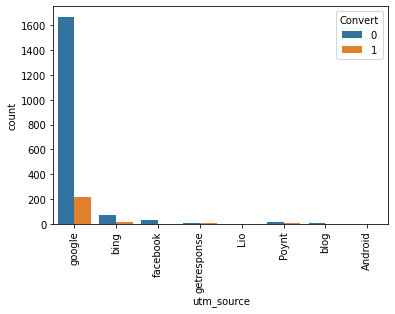

In [21]:
sns.countplot(x = 'utm_source', hue = 'Convert', data = dados)
plt.xticks(rotation = 90)

## one hot encoding

In [ ]:
ohe.fit_transform(dados[['perfil_pessoa','name','utm_source']])

In [27]:
dummy1 = pd.get_dummies(dados[['perfil_pessoa','name','utm_source']], drop_first = True)
dummy1.head()

,perfil_pessoa_dono,perfil_pessoa_funcionario,perfil_pessoa_outro,name_cafe,name_lanche,name_no_name,name_outros,name_pizzaria,name_restaurante,name_sorveteria,name_truck,utm_source_Lio,utm_source_Poynt,utm_source_bing,utm_source_blog,utm_source_facebook,utm_source_getresponse,utm_source_google
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
dados = pd.concat([dados,dummy1],axis = 1)
dados.head()

,ID,mes,perfil_pessoa,name,utm_source,Convert,perfil_pessoa_dono,perfil_pessoa_funcionario,perfil_pessoa_outro,name_cafe,name_lanche,name_no_name,name_outros,name_pizzaria,name_restaurante,name_sorveteria,name_truck,utm_source_Lio,utm_source_Poynt,utm_source_bing,utm_source_blog,utm_source_facebook,utm_source_getresponse,utm_source_google
0,8514,201707,dono,no_name,google,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1183,201701,dono,no_name,google,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,7696,201706,dono,no_name,google,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,7694,201706,dono,no_name,google,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,7679,201706,dono,no_name,google,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
dados = dados.drop(['perfil_pessoa','name','utm_source'], axis = 1)
dados.head()

,ID,mes,Convert,perfil_pessoa_dono,perfil_pessoa_funcionario,perfil_pessoa_outro,name_cafe,name_lanche,name_no_name,name_outros,name_pizzaria,name_restaurante,name_sorveteria,name_truck,utm_source_Lio,utm_source_Poynt,utm_source_bing,utm_source_blog,utm_source_facebook,utm_source_getresponse,utm_source_google
0,8514,201707,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1183,201701,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,7696,201706,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,7694,201706,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,7679,201706,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


## Criando X e y

In [31]:
X = dados.iloc[:,3:21]
X.head()

,perfil_pessoa_dono,perfil_pessoa_funcionario,perfil_pessoa_outro,name_cafe,name_lanche,name_no_name,name_outros,name_pizzaria,name_restaurante,name_sorveteria,name_truck,utm_source_Lio,utm_source_Poynt,utm_source_bing,utm_source_blog,utm_source_facebook,utm_source_getresponse,utm_source_google
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
y = dados.Convert
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Convert, dtype: int64

## Criando o modelo

In [33]:
from sklearn.model_selection import train_test_split


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
modelo = LogisticRegression(random_state = 0)
modelo.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
ypred= modelo.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,ypred)
print(cm)

[[634   8]
 [144  10]]


In [51]:
#test
acuracia = accuracy_score(ypred,y_test)
acuracia

0.8090452261306532